# Time Series and Machine Learning Primer

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Python, Datacamp, Machine Learning]
- image: images/datacamp/1_supervised_learning_with_scikit_learn/2_regression.png

> Note: This is a summary of the course's chapter 1 exercises "Machine Learning for Time Series Data in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
#plt.style.use('fivethirtyeight')

## Time Series and Machine Learning Primer


### Identifying a time series


<p>Which of the following data sets is <strong>not</strong> considered time series data?</p>

<pre>
Possible Answers

Test grades for the last fall and spring semesters of high-school students.

A student's attendance record each week of the semester.

The school's national annual ranking since 2000.

<b>A list of the average length of each class at the school.</b>

</pre>

**You don't have timestamps for each data point, so it is not a time series.**

### Plotting a time series (I)


<div class=""><p>In this exercise, you'll practice plotting the values of two time series without the time component. </p>
<p>Two DataFrames, <code>data</code> and <code>data2</code> are available in your workspace. </p>
<p>Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.</p>
<p><strong>Note</strong>: This course assumes some familiarity with time series data, as well as how to use
them in data analytics pipelines. For an introduction to time series, we recommend the
<a href="https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python" target="_blank" rel="noopener noreferrer">Introduction to Time Series Analysis in Python</a> and <a href="https://www.datacamp.com/courses/visualizing-time-series-data-in-python" target="_blank" rel="noopener noreferrer">Visualizing Time Series Data with Python</a> courses.</p></div>

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data.csv', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data2.csv', index_col=0)

Instructions 1/3
<p>Print the first five rows of <code>data</code>.</p>

In [3]:
# Print the first 5 rows of data
print(data)

        data_values
symbol             
0        214.009998
1        214.379993
2        210.969995
3        210.580000
4        211.980005
...             ...
1757     116.519997
1758     117.260002
1759     116.760002
1760     116.730003
1761     115.820000

[1762 rows x 1 columns]


Instructions 2/3
<p>Print the first five rows of <code>data2</code>.</p>

In [4]:
# Print the first 5 rows of data2
print(data2.head(5))

   data_values
0    -0.006928
1    -0.007929
2    -0.008900
3    -0.009815
4    -0.010653


Instructions 3/3

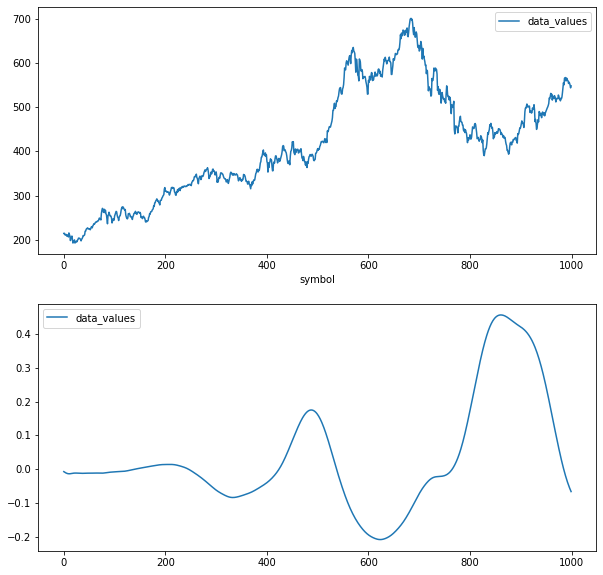

In [5]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show()

**What kind of data do you think each plot represents?**

### Plotting a time series (II)


<p>You'll now plot both the datasets again, but with the included time stamps for
each  (stored in the column called <code>"time"</code>). Let's see if this gives you
some more context for understanding each time series data.</p>

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data_time.csv', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/data2_time.csv', index_col=0)

Instructions
<ul>
<li>Plot <code>data</code> and <code>data2</code> on top of one another, one per axis object.  </li>
<li>The x-axis should represent the time stamps and the y-axis should represent the dataset values.</li>
</ul>

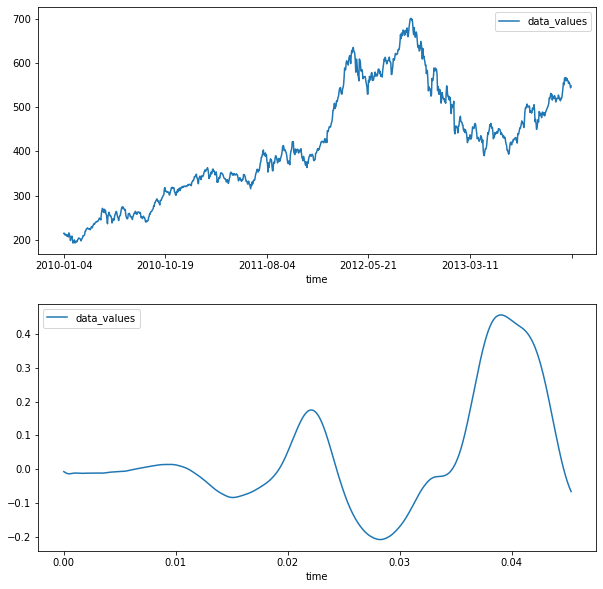

In [8]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show()

**As you can now see, each time series has a very different sampling frequency (the amount of time between samples). The first is daily stock market data, and the second is an audio waveform.**

## Machine learning basics

### Fitting a simple model: classification


<div class=""><p>In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.</p>
<p><strong>Note</strong>: This course assumes some familiarity with Machine Learning and <code>scikit-learn</code>. For an introduction to scikit-learn, we recommend the <a href="https://www.datacamp.com/courses/supervised-learning-with-scikit-learn" target="_blank" rel="noopener noreferrer">Supervised Learning with Scikit-Learn</a> and <a href="https://www.datacamp.com/courses/preprocessing-for-machine-learning-in-python" target="_blank" rel="noopener noreferrer">Preprocessing for Machine Learning in Python</a> courses.</p></div>

![](https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/figures/iris_figure.svg)

Instructions 1/2
<p>Print the first five rows of <code>data</code>.</p>

In [11]:
# Print the first 5 rows for inspection
print(data.head(5))

    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
50                7.0               3.2  ...               1.4       1
51                6.4               3.2  ...               1.5       1
52                6.9               3.1  ...               1.5       1
53                5.5               2.3  ...               1.3       1
54                6.5               2.8  ...               1.5       1

[5 rows x 5 columns]


Instructions 2/2

In [32]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = data[['petal length (cm)', 'petal width (cm)']]
y = data['target'].values #data[['target']]

# Fit the model
model = LinearSVC()
model.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**You've successfully fit a classifier to predict flower type!**

### Predicting using a classification model


<div class=""><p>Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some
newly-collected flowers.</p>
<p>Information about petal width and length for several new flowers is stored
in the variable <code>targets</code>. Using the classifier you fit, you'll predict the type of each flower.</p></div>

In [34]:
targets = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/targets_iris.csv')

Instructions
<ul>
<li>Predict the flower type using the array <code>X_predict</code>. </li>
<li>Run the given code to visualize the predictions.</li>
</ul>

[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


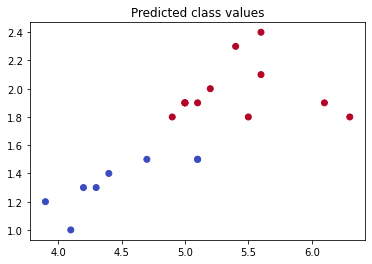

In [36]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

**Note that the output of your predictions are all integers, representing that datapoint's predicted class**

### Fitting a simple model: regression


<div class=""><p>In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called <code>boston</code> is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?</p>
<ul>
<li><code>"AGE"</code>: proportion of owner-occupied units built prior to 1940 </li>
<li><code>"RM"</code> : average number of rooms per dwelling</li>
</ul></div>

![](https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/figures/avg_rooms.svg)

In [37]:
boston = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/boston_506x13.csv')

Instructions
<ul>
<li>Prepare <code>X</code> and <code>y</code> DataFrames using the data in <code>boston</code>.<ul>
<li><code>X</code> should be the proportion of houses built prior to 1940, <code>y</code> average number of rooms per dwelling. </li></ul></li>
<li>Fit a regression model that uses these variables (remember to shape the variables correctly!).</li>
<li>Don't forget that each variable must be the correct shape for scikit-learn to use it!</li>
</ul>

In [52]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = boston['AGE'].values.reshape(-1, 1)
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**In regression, the output of your model is a continuous array of numbers, not class identity.**

### Predicting using a regression model


<div class=""><p>Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.</p>
<p>A 1-D array <code>new_inputs</code> consisting of 100 "new" values for <code>"AGE"</code> (proportion of owner-occupied units built prior to 1940) is available in your workspace along with the <code>model</code> you fit in the previous exercise.</p></div>

In [53]:
new_inputs = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/new_inputs.csv')

In [56]:
new_inputs.values.shape

(100, 1)

Instructions
<ul>
<li>Review <code>new_inputs</code> in the shell. </li>
<li>Reshape <code>new_inputs</code> appropriately to generate predictions.   </li>
<li>Run the given code to visualize the predictions.</li>
</ul>

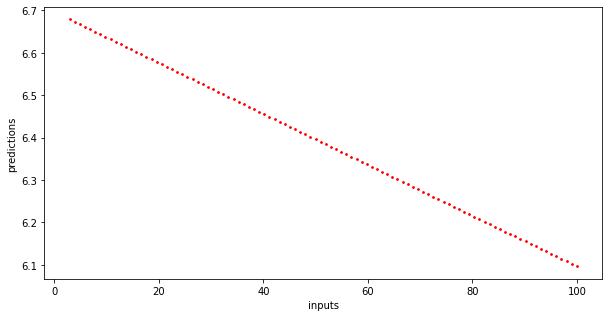

In [65]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.values) #new_inputs.reshape(-1, 1)

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

**Here the red line shows the relationship that your model found. As the proportion of pre-1940s houses gets larger, the average number of rooms gets slightly lower.**

## Machine learning and time series data


### Inspecting the classification data


<div class=""><p>In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.</p>
<p>The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat <em>abnormally</em>. This dataset contains a <em>training</em> set with labels for each type of heartbeat, and a <em>testing</em> set with no labels. You'll use the <em>testing</em> set to validate your models.</p>
<p>As you have labeled data, this dataset is ideal for <em>classification</em>. In fact, it was originally offered as a part of a <a href="https://www.kaggle.com/kinguistics/heartbeat-sounds" target="_blank" rel="noopener noreferrer">public Kaggle competition</a>.</p></div>

In [89]:
#@title ⠀ { display-mode: "both" }
!apt install subversion
#!svn export https://github.com/lnunesAI/Datacamp.git/trunk/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/files
!wget https://github.com/lnunesAI/Datacamp/tree/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/files
data_dir = '/content/files'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
--2021-01-27 18:11:52--  https://github.com/lnunesAI/Datacamp/tree/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/files
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
files: Is a directory

Cannot write to ‘files’ (Success).


Instructions
<ul>
<li>Use <code>glob</code> to return a list of the <code>.wav</code> files in <code>data_dir</code> directory. </li>
<li>Import the first audio file in the list using <code>librosa</code>. </li>
<li>Generate a <code>time</code> array for the data.</li>
<li>Plot the waveform for this file, along with the time array.</li>
</ul>

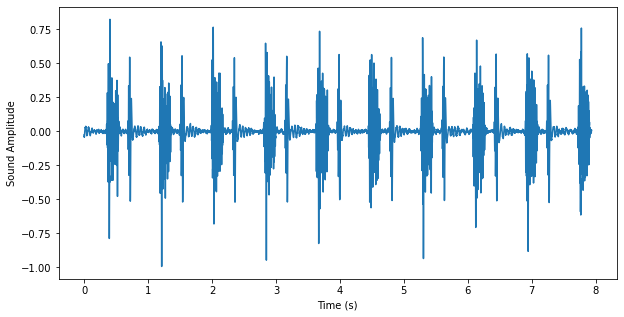

In [103]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = sorted(glob(data_dir + '/*.wav'))

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[1])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

**There are several seconds of heartbeat sounds in here, though note that most of this time is silence. A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.**

### Inspecting the regression data


<div class=""><p>The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a <a href="https://www.kaggle.com/dgawlik/nyse" target="_blank" rel="noopener noreferrer">public Kaggle competition</a>. </p>
<p>In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.</p></div>

In [104]:
path = 'https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/9-machine-learning-for-time-series-data-in-python/datasets/prices.csv'

Instructions
<ul>
<li>Import the data with Pandas (stored in the file <code>'prices.csv'</code>). </li>
<li>Convert the index of <code>data</code> to <code>datetime</code>. </li>
<li>Loop through each column of <code>data</code> and plot the the column's values over time.</li>
</ul>

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


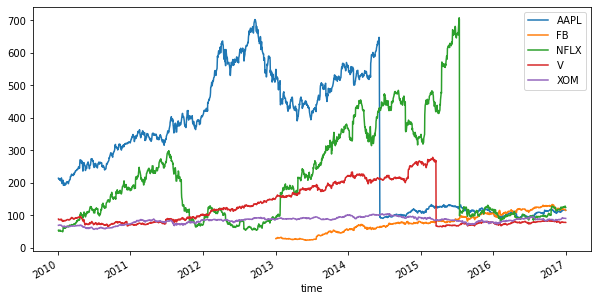

In [105]:
# Read in the data
data = pd.read_csv(path, index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

**Note that each company's value is sometimes correlated with others, and sometimes not. Also note there are a lot of 'jumps' in there - what effect do you think these jumps would have on a predictive model?**